In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import pandas as pd
import geopandas as gpd
import numpy as np

In [2]:
bigp = ['AL', 'BNP', 'Jamaat', 'JaPa']
mainp = ['AL', 'BNP']
years = [1991, 1996, 2001, 2008]

In [3]:
dfc = pd.read_csv('data/candidate_result.csv')
dfc.head()

,seat,year,party,name,votes,votes_pc,winner
0,Dhaka-3,2008,BNP,Gayeshwar Chandra Roy,70680.0,36.71,no
1,Dhaka-6,1991,Independent,Sayed Sharafat Hossain,8.0,0.01,no
2,Dhaka-6,1991,Jatiya Janata Party (Asad),Md. Afzalul Huq Afzal,9.0,0.01,no
3,Comilla-3,2001,Independent,Md. Ainul Haque,12.0,0.01,no
4,Dhaka-5,1991,Jatiyatabadi Gonotantrik Chashi Dal,Afzaluddin Chowdhury,14.0,0.01,no


In [4]:
dfc.shape

(8747, 7)

In [5]:
# only take 1991-2008 election data
dfc = dfc[dfc.year.isin(years)]
dfc.shape

(8183, 7)

In [6]:
# only take winners data
dfcwin = dfc[dfc.winner == 'yes']
dfcwin.shape

(1150, 7)

In [7]:
bdmap = gpd.read_file('map/seats.shp')
bdmap.head()

,seat_no,seat,district,division,region,shape_len,shape_area,geometry
0,1,Panchagarh-1,Panchagarh,Rangpur,Urban,2.787812,0.061199,"POLYGON ((88.72746 26.34527, 88.72772 26.34494..."
1,2,Panchagarh-2,Panchagarh,Rangpur,Rural,1.411258,0.064286,"POLYGON ((88.76158 26.30059, 88.76176 26.29971..."
2,3,Thakurgaon-1,Thakurgaon,Rangpur,Urban,1.255212,0.058832,"POLYGON ((88.55589 26.17948, 88.55684 26.17788..."
3,4,Thakurgaon-2,Thakurgaon,Rangpur,Rural,1.858839,0.045806,"POLYGON ((88.32191 26.20205, 88.3222 26.20129,..."
4,5,Thakurgaon-3,Thakurgaon,Rangpur,Rural,1.810654,0.059069,"POLYGON ((88.25475 26.03583, 88.25828 26.03391..."


In [8]:
# join data with map data to get region
df_region = pd.merge(bdmap[['seat', 'region']], dfcwin[['seat', 'year', 'party']], how='left', on='seat')
df_region.head()

,seat,region,year,party
0,Panchagarh-1,Urban,1991,BNP
1,Panchagarh-1,Urban,1996,BNP
2,Panchagarh-1,Urban,2001,BNP
3,Panchagarh-1,Urban,2008,AL
4,Panchagarh-2,Rural,1991,CPB


In [9]:
# find win count for each year for each region of each party
dfr = df_region.groupby(['year', 'region', 'party']).size().reset_index(name='count')
dfr

,year,region,party,count
0,1991,Rural,AL,70
1,1991,Rural,BAKSAL,3
2,1991,Rural,BNP,85
3,1991,Rural,CPB,4
4,1991,Rural,Ganatantri Party,1
5,1991,Rural,Independent,2
6,1991,Rural,Islami Oikya Jote,1
7,1991,Rural,JSD (Siraj),1
8,1991,Rural,JaPa,27
9,1991,Rural,Jamaat,14


In [10]:
# only keep AL and BNP data
dfr = dfr[dfr.party.isin(mainp)].copy()
dfr

,year,region,party,count
0,1991,Rural,AL,70
2,1991,Rural,BNP,85
13,1991,Urban,AL,15
15,1991,Urban,BNP,49
20,1996,Rural,AL,107
21,1996,Rural,BNP,75
27,1996,Urban,AL,34
28,1996,Urban,BNP,31
31,2001,Rural,AL,44
33,2001,Rural,BNP,128


In [11]:
dfr.to_csv('dataout/mainp_region_win.csv', index=False)

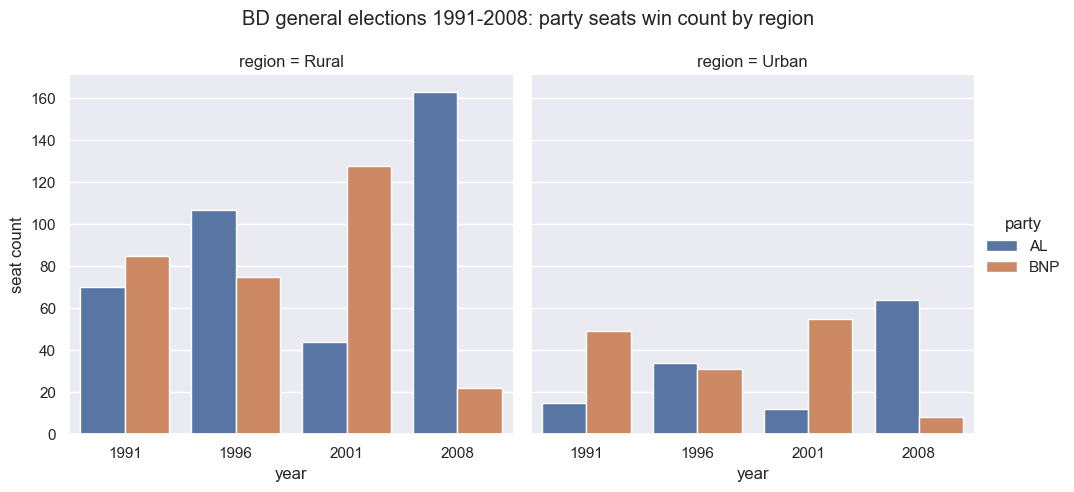

In [14]:
# plot bar chart for each region
g = sns.catplot(x="year", y='count', col="region", hue='party', data=dfr, kind ='bar')
g.fig.subplots_adjust(top=0.85)
g.set_ylabels('seat count')
g.fig.suptitle('BD general elections 1991-2008: party seats win count by region')
g.fig.savefig('fig/mainp_region_win',bbox_inches='tight')

In [20]:
# get average seats won by AL and BNP for each region
dfrm = dfr.groupby(['party', 'region']).mean()['count'].round().reset_index()
dfrm

,party,region,count
0,AL,Rural,96.0
1,AL,Urban,31.0
2,BNP,Rural,78.0
3,BNP,Urban,36.0


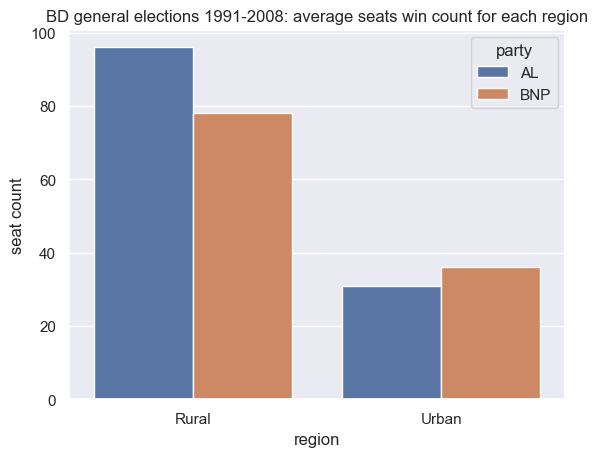

In [24]:
# plot bar chart for average seats won
ax = sns.barplot(x="region", y='count', hue='party', data=dfrm)
ax.set_ylabel('seat count')
ax.set_title('BD general elections 1991-2008: average seats win count for each region')
ax.figure.savefig('fig/mainp_region_win_avg',bbox_inches='tight')